In [1]:
pip install svgwrite


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 471.0 kB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


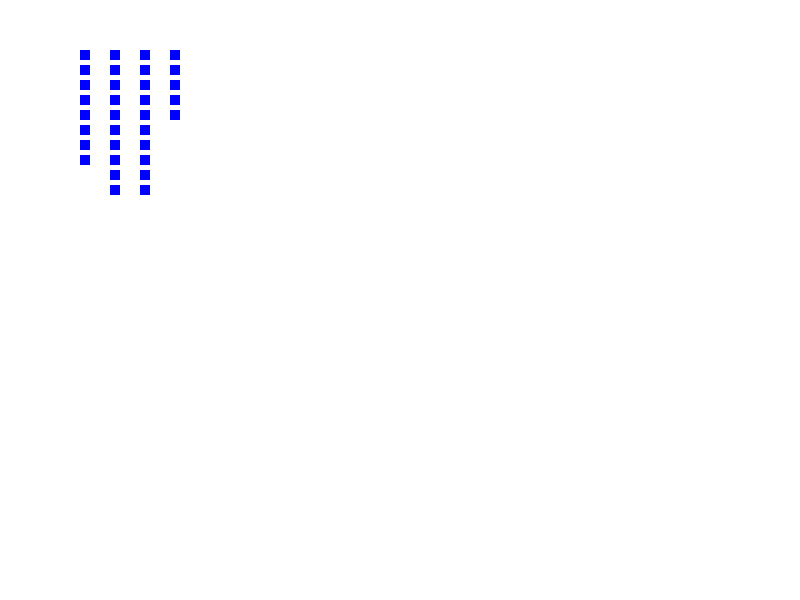

In [ ]:
import svgwrite
from IPython.display import SVG, display

dwg = svgwrite.Drawing('example.svg', size=(800, 600))

def neuron(x, y):
    dwg.add(dwg.rect((x, y), (10, 10), fill='blue'))

min_x = 80

layers = [8, 10, 10, 5]

for (layer_i, layer) in enumerate(layers):
    for neuron_i in range(0, layer):
        def n_x(): return min_x + layer_i * 30
        def n_y(): return 50 + neuron_i * 15

        neuron(n_x(), n_y())

display(SVG(dwg.tostring()))

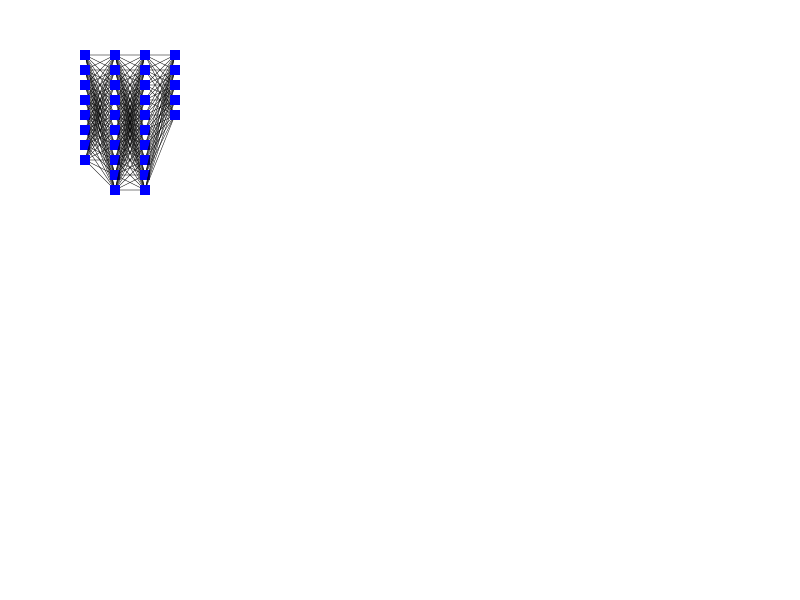

In [29]:
import svgwrite
from IPython.display import SVG, display

layers = [8, 10, 10, 5]

dwg = svgwrite.Drawing('example.svg', size=(800, 600))

def neuron(x, y):
    dwg.add(dwg.rect((x, y), (10, 10), fill='blue'))

def connection(p1, p2):
    dwg.add(dwg.line(p1, p2, stroke='black', stroke_width=0.5))

min_x = 80
def n_x(p): return min_x + p * 30
def n_y(p): return 50 + p * 15

for (layer_i, layer) in enumerate(layers):
    for neuron_i in range(0, layer):
        if layer_i < len(layers) - 1:
            next_layer = layers[layer_i + 1]
            for j in range(next_layer):
               connection((n_x(layer_i) + 5, n_y(neuron_i) + 5),
                          (n_x(layer_i+1) + 5, n_y(j) + 5))

        neuron(n_x(layer_i), n_y(neuron_i))

display(SVG(dwg.tostring()))